In [7]:
from __future__ import annotations

from matplotlib import pyplot as plt
import numpy as np

from processing_test import ProcessorInterface
from plotting import load_wav, plot_chunk, plot_series, SAMPLE_RATE, CHUNK_TIME, FFT_SIZE, FFT_OUT_SIZE

plt.style.use('ggplot')

interface = ProcessorInterface(window=False)

# Generated

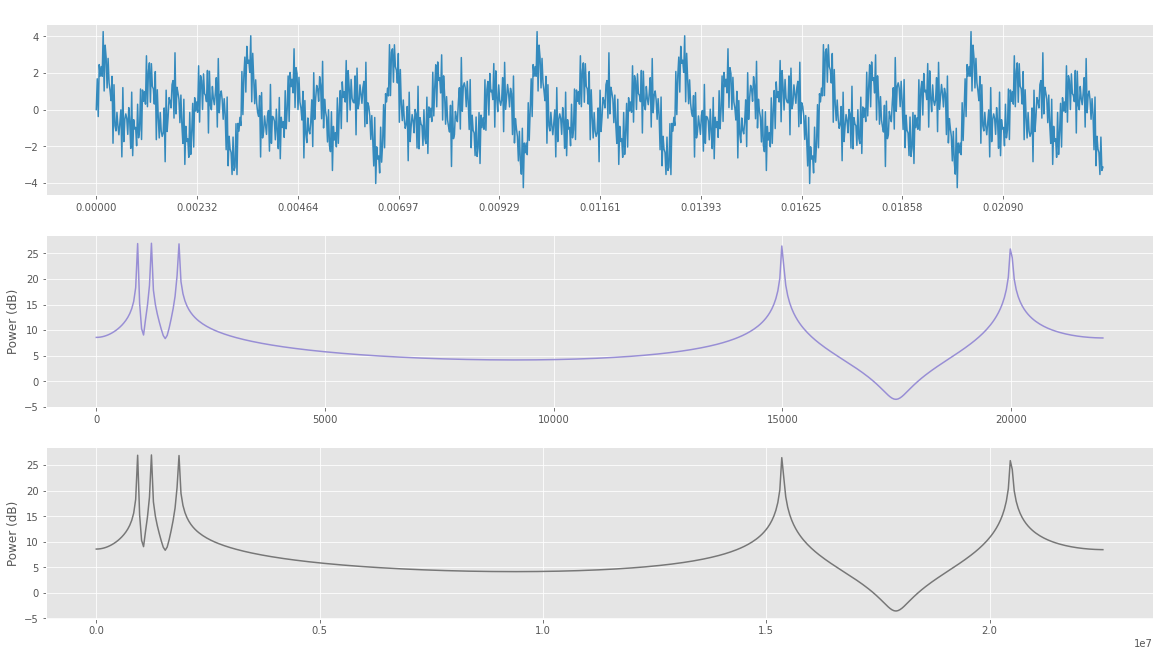

In [8]:
indexes = np.arange(SAMPLE_RATE * CHUNK_TIME)
samples = (
    np.sin(2 * np.pi * indexes * 900 / SAMPLE_RATE)
    + np.sin(2 * np.pi * indexes * 1200 / SAMPLE_RATE)
    + np.sin(2 * np.pi * indexes * 1800 / SAMPLE_RATE)
    + np.sin(2 * np.pi * indexes * 15000 / SAMPLE_RATE)
    + np.sin(2 * np.pi * indexes * 20000 / SAMPLE_RATE)
).astype(np.float32)

processed_chunk = np.array(interface.process_chunks(samples), dtype=np.float32)

plot_chunk(
    0,
    samples,
    processed_chunk,
)

# From samples

Wav params: {
	nchannels: 2,
	sampwidth: 2,
	framerate: 44100,
	nframes: 6416844,
	comptype: NONE,
	compname: not compressed,
}
Read 25667376 bytes. 4 bytes per frame


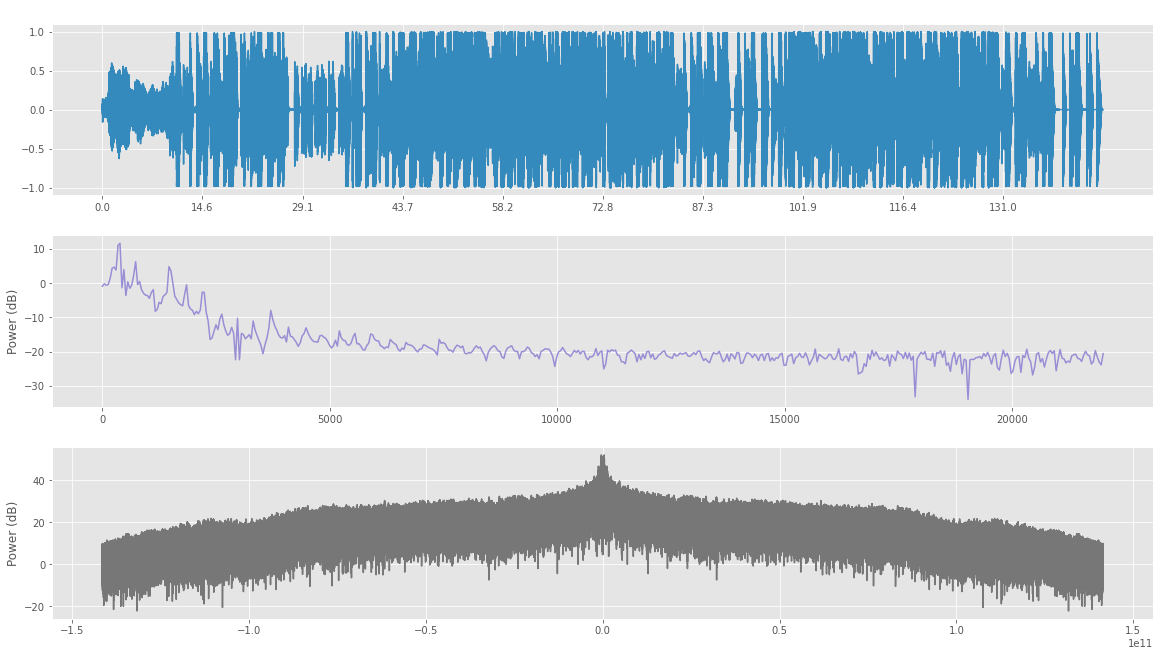

In [11]:
real_samples = load_wav("song.wav", "left")

processed_chunk = np.array(interface.process_chunks(real_samples[:FFT_SIZE]), dtype=np.float32)
plot_chunk(
    0,
    real_samples[:FFT_SIZE],
    processed_chunk,
)

# Whole file

In [13]:
fft_samples = np.array(interface.process_chunks(real_samples))
fft_samples = fft_samples.reshape((len(fft_samples) // FFT_OUT_SIZE, FFT_OUT_SIZE))
db_power = 10 * np.log10(fft_samples)

plot_series(0, real_samples, db_power)

C:\Users\eloci\AppData\Local\Temp/ipykernel_48284/3583138961.py:3: RuntimeWarning: divide by zero encountered in log10
  db_power = 10 * np.log10(fft_samples)


NameError: name 'plot_series' is not defined

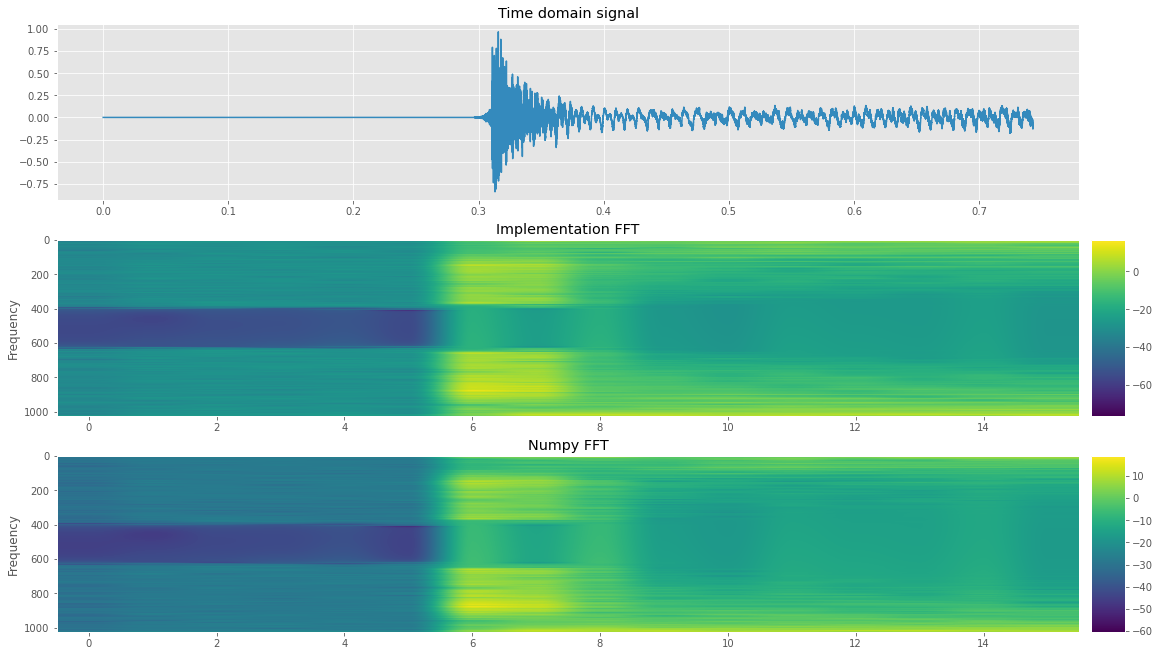

In [ ]:
slice_len = 16
plot_series(0, real_samples[:slice_len * FFT_SIZE], db_power[:slice_len])